## **1. Import libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **2. Load the data set**

In [24]:
df = pd.read_csv('/content/03_PGES_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [25]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.408935
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.292430
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.251812
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.585027
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
2130,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638
2131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.823909
2132,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.769551


### **3.1. Input features**

In [26]:
X = df.drop('pIC50', axis=1)
X.shape

(2134, 881)

### **3.2. Output features**

In [27]:
Y = df.pIC50
Y.describe()

count    2134.000000
mean        6.889159
std         1.371797
min         3.698970
25%         5.698970
50%         6.744727
75%         8.251812
max        10.000000
Name: pIC50, dtype: float64

## **4. Data split (80/20 ratio)**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, Y_train.shape

((1707, 881), (1707,))

In [30]:
X_test.shape, Y_test.shape

((427, 881), (427,))

In [31]:
def AIC(y_pred,y_real,x):
    mseloss=mean_squared_error(y_pred,y_real)
    x_len=y_pred.shape[0]
    n_features=x.shape[1]

    aic=2*n_features-2*np.log(mseloss)

    return aic

def BIC(y_pred,y_real,x):
    mseloss=mean_squared_error(y_pred,y_real)
    x_len=y_pred.shape[0]
    n_features=x.shape[1]

    bic=np.log(x_len)*n_features - 2*np.log(mseloss)

    return bic

## **5. Building a Regression Model using Random Forest**

In [32]:


# Set random seed for reproducibility
np.random.seed(100)

# Instantiate and fit RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(Y_test, Y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

aic = AIC(Y_pred, Y_test, X_train)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"AIC: {aic}")

R-squared (R2): 0.5403
Mean Squared Error (MSE): 0.8805
AIC: 1762.2545393124306


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

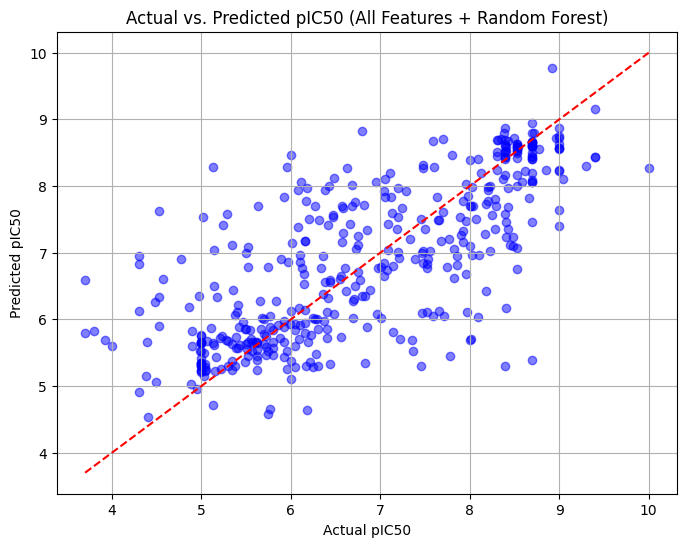

In [33]:
# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted values
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Actual vs. Predicted pIC50 (All Features + Random Forest)')
plt.grid(True)

plt.savefig('All_Features_Actual vs. Predicted pIC50.png')
plt.show()

In [34]:
Y_pred_all = model.predict(X)

In [35]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(Y, Y_pred_all)

# Calculate mean squared error (MSE)
mse = mean_squared_error(Y, Y_pred_all)

aic = AIC(Y_pred_all, Y, X_train)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"AIC: {aic}")

R-squared (R2): 0.7819
Mean Squared Error (MSE): 0.4102
AIC: 1763.7823073154602


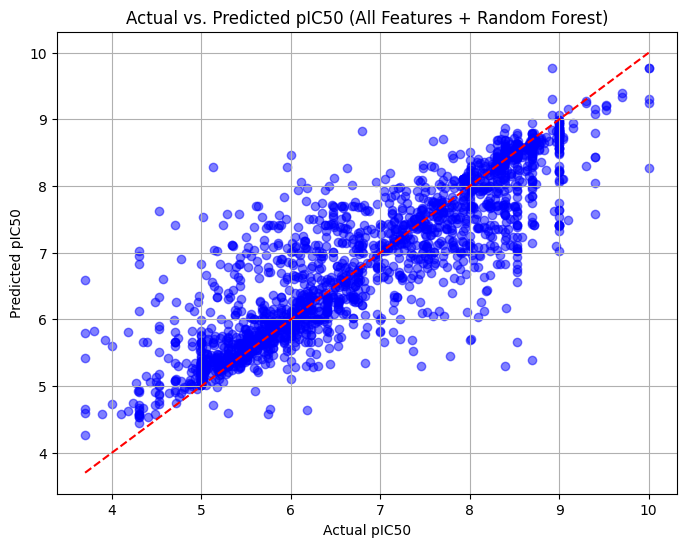

In [36]:
# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred_all, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted values
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Actual vs. Predicted pIC50 (All Features + Random Forest)')
plt.grid(True)

plt.savefig('All_Features_Actual vs. Predicted pIC50_entire_dataset.png')
plt.show()

Model: Linear Regression
Mean Squared Error: 72816005965679068971008.00
R^2 Score: -38014115369950491181056.00
--------------------
Model: Ridge Regression
Mean Squared Error: 0.80
R^2 Score: 0.58
--------------------
Model: Lasso Regression
Mean Squared Error: 1.93
R^2 Score: -0.01
--------------------
Model: Random Forest
Mean Squared Error: 0.87
R^2 Score: 0.55
--------------------
Model: Gradient Boosting
Mean Squared Error: 0.73
R^2 Score: 0.62
--------------------
Model: K-Nearest Neighbors
Mean Squared Error: 0.81
R^2 Score: 0.58
--------------------
Model: Decision Tree
Mean Squared Error: 1.25
R^2 Score: 0.35
--------------------
Model: Support Vector Regression
Mean Squared Error: 0.69
R^2 Score: 0.64
--------------------


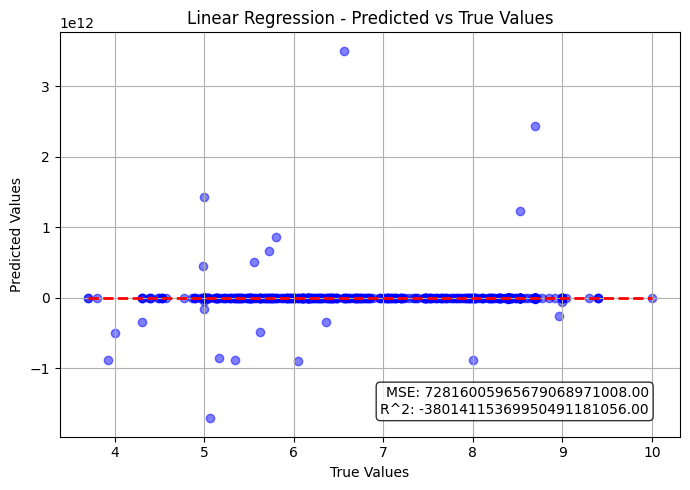

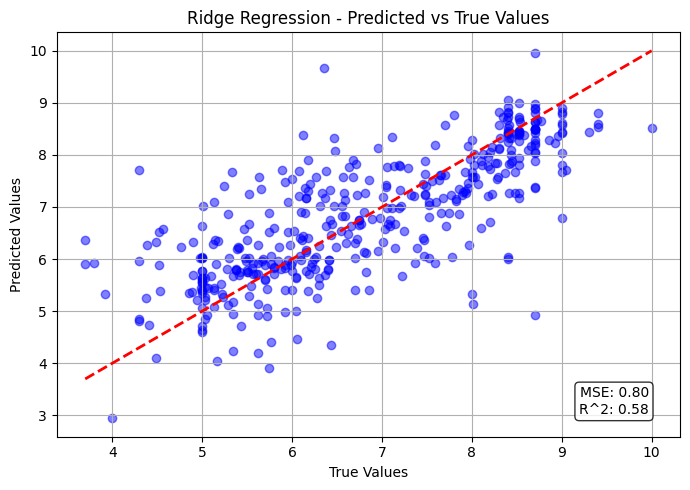

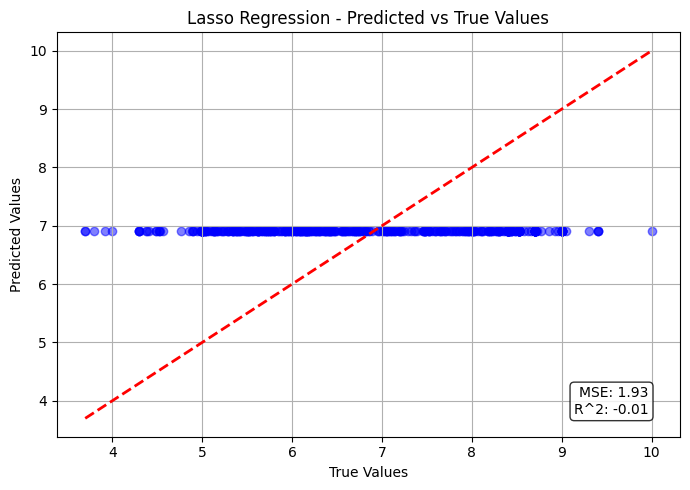

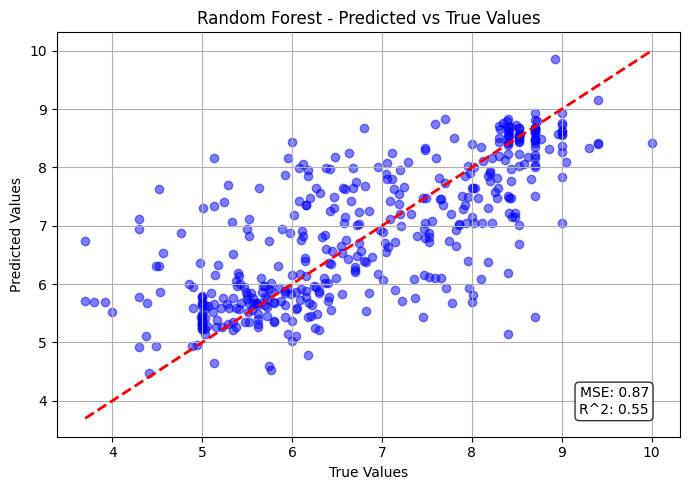

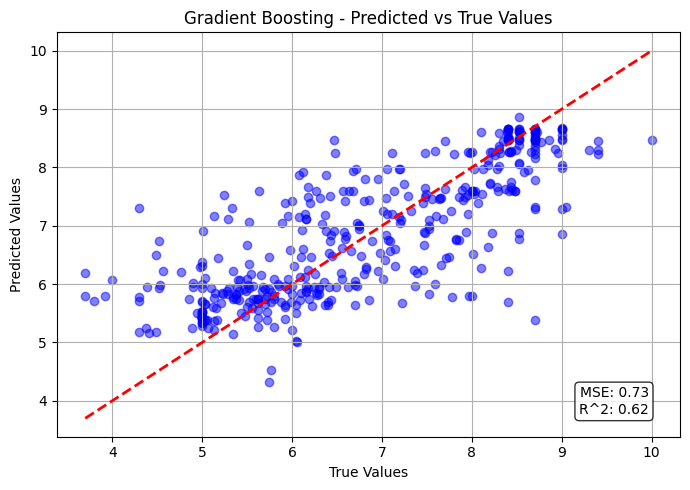

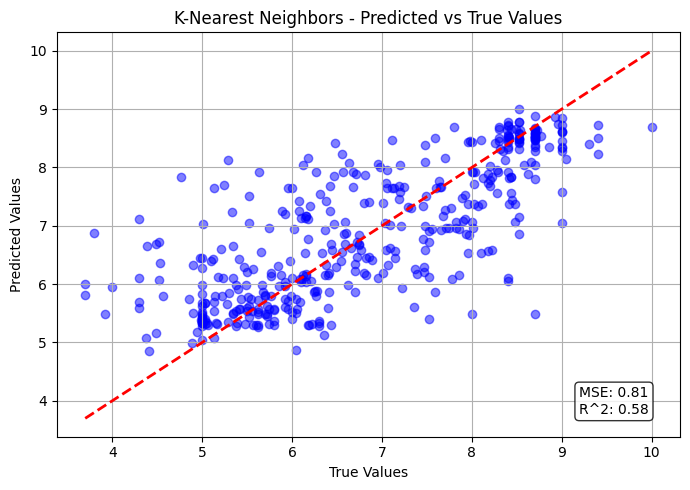

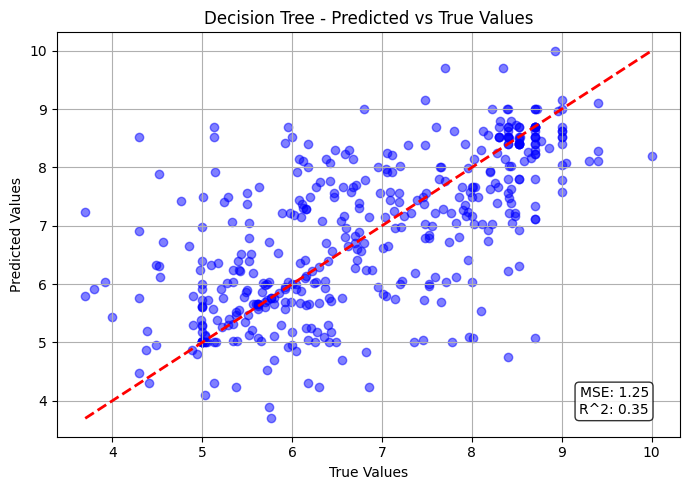

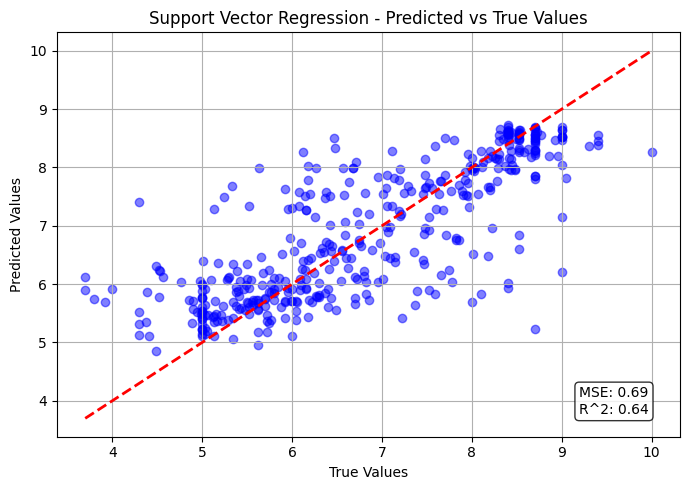

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a list of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0)),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=5)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Support Vector Regression", SVR(kernel='rbf'))
]

# Iterate over each model
for name, model in models:
    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    aic = AIC(y_pred, Y_test, X_train)

    # Plot predicted vs true values
    plt.figure(figsize=(7, 5))
    plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red', linewidth=2)
    plt.title(f"{name} - Predicted vs True Values")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()

    # Display evaluation metrics
    plt.text(0.95, 0.05, f"MSE: {mse:.2f}\nR^2: {r2:.2f}", ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Save or show plot
    plt.savefig(f"All_Features_{name}_predicted_vs_true.png")
    #plt.show()

    # Display results
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("--------------------")


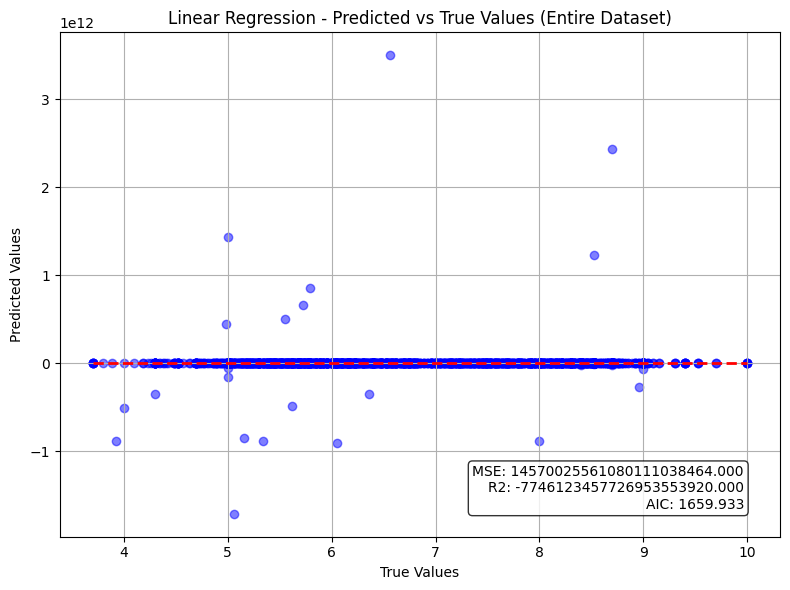

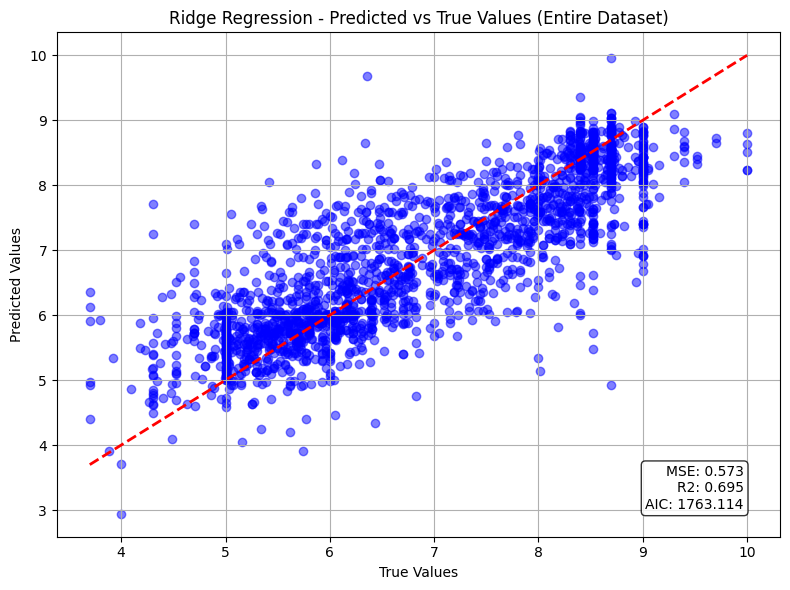

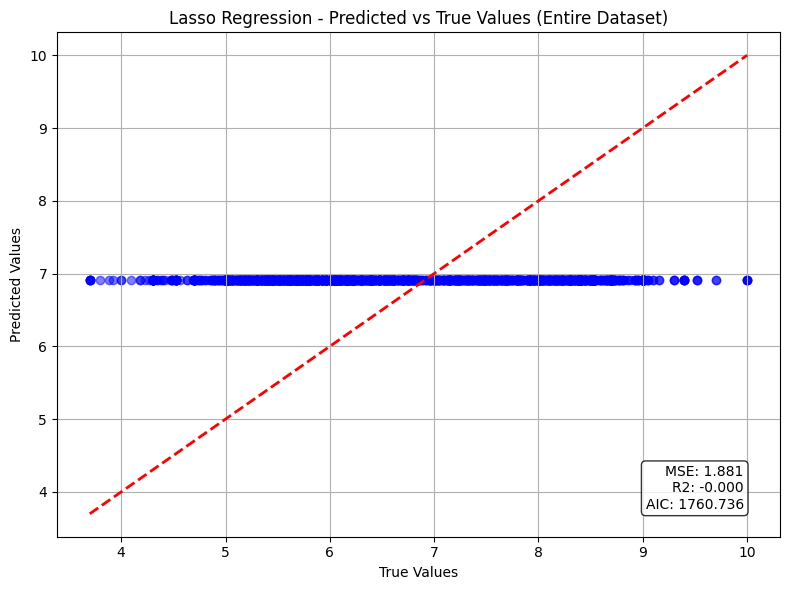

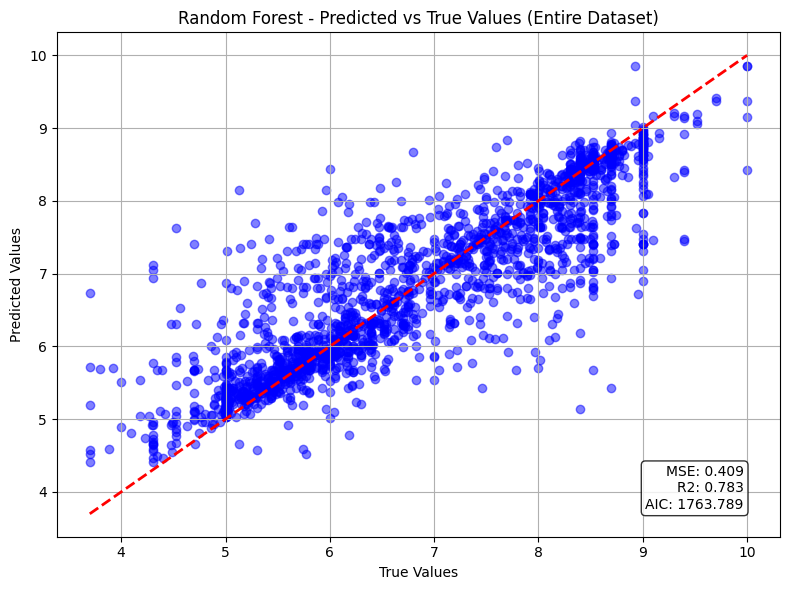

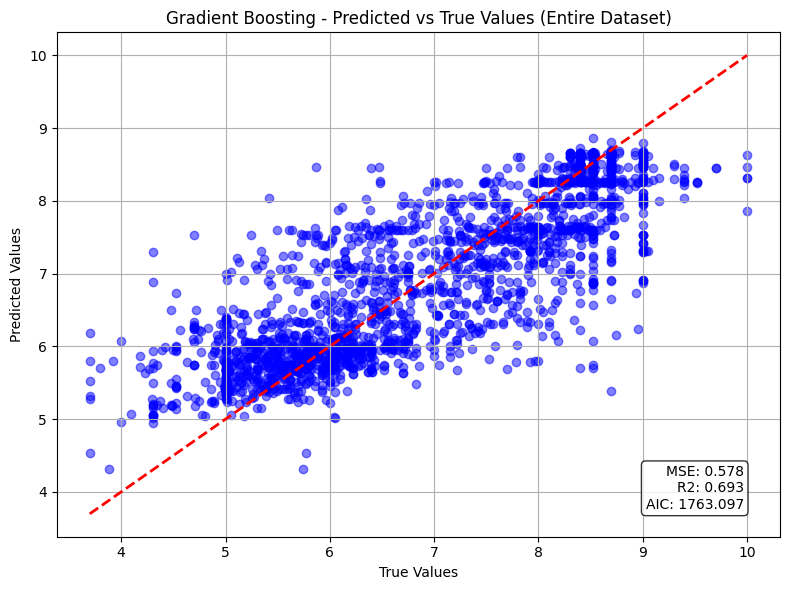

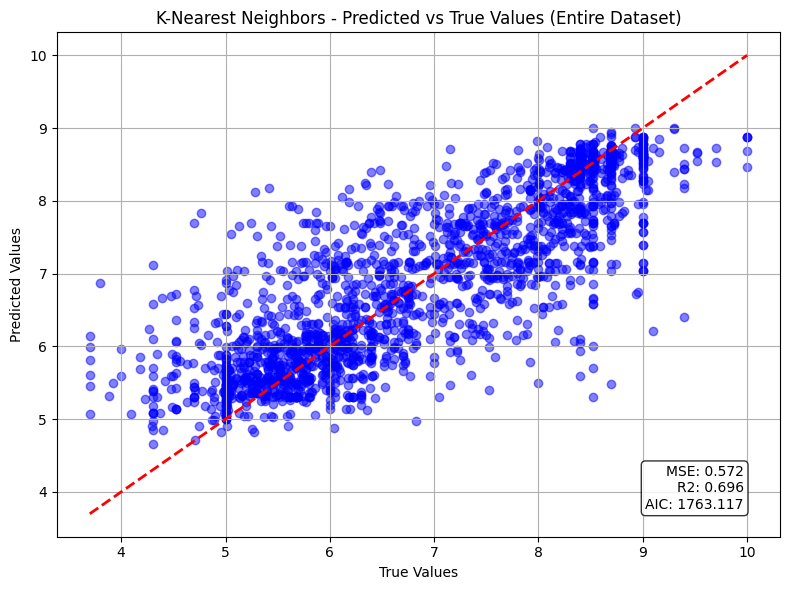

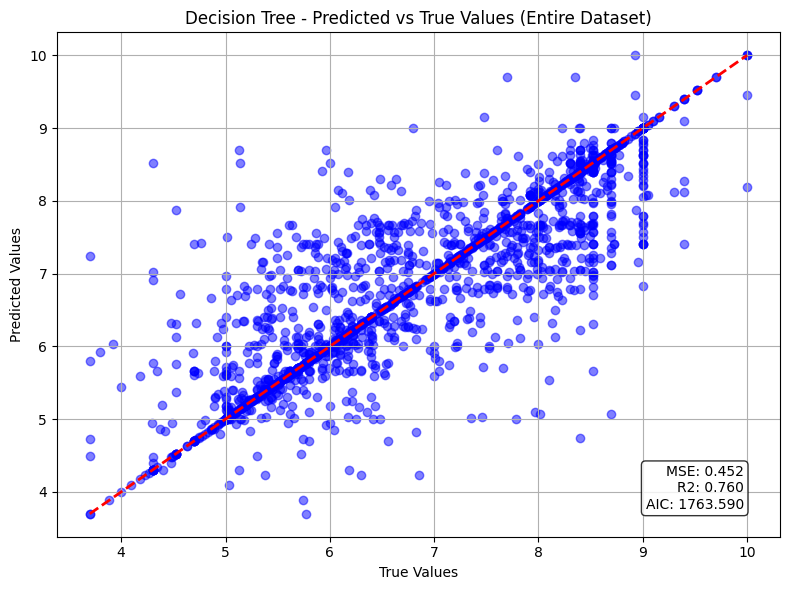

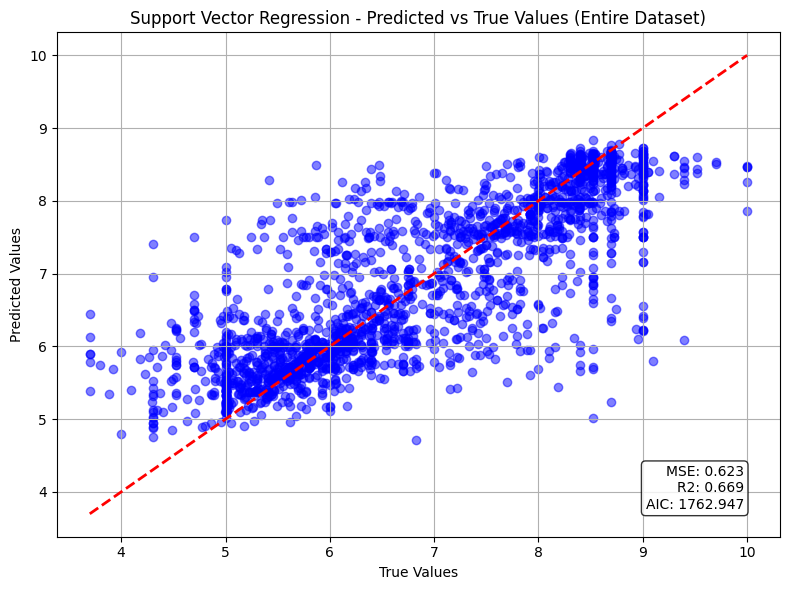

In [38]:
# Predictions on All Data

# Iterate over each model
for name, model in models:
    # Fit the model on the entire dataset
    model.fit(X_train, Y_train)

    # Make predictions on the entire dataset
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(Y, y_pred)
    r2 = r2_score(Y, y_pred)
    aic = AIC(y_pred, Y, X_train)

    # Plot predicted vs true values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y, y_pred, color='blue', alpha=0.5)
    plt.plot([min(Y), max(Y)], [min(Y), max(Y)], '--', color='red', linewidth=2)
    plt.title(f"{name} - Predicted vs True Values (Entire Dataset)")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()

    # Display evaluation metrics
    plt.text(0.95, 0.05, f"MSE: {mse:.3f}\nR2: {r2:.3f}\nAIC: {aic:.3f}", ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Save or show plot
    plt.savefig(f"All_Features_{name}_entire_dataset_predicted_vs_true.png")
    plt.show()
